In [ ]:
# code shared by Emily Galvin

# Spatial Data Basics with sf in R (Part 3)

This jupyter notebook contains the code and documentation for part 3 of the "Spatial Data Basics with sf in R" workshop with R-Ladies RTP.

All of the code that was used to create this tutorial can be found on GitHub here: https://github.com/sheilasaia/sf-workshop-rladies. Please contact Sheila Saia via Meetup or in the Zoom chat during the workshop, if you have any questions.

Special thanks to Dallas Hoffman for all their feedback and help with running this multi-part workshop!

## Learning Outcomes

By the end of part 3 of the workshop attendees will be able to:

1. **apply** sf and tidyverse operations to wrangle and map real-world spatial data

Meetup page for Part 3: https://www.meetup.com/rladies-rtp/events/286866014/

To start, load the `tidyverse`, `sf`, and `here` R packages.

In [1]:
# load the libraries
# add your code here
library(tidyverse)
library(here)
library(sf)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /home/jovyan

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3; sf_use_s2() is TRUE



## Real-World Spatial Data

There were several spatial datasets that we've worked with so far (that are located in the data director of this project).

Some data we've already worked with:

- Southeastern state bounds
- North Carolina bounds
- North Carolina median income
- North Carolina USGS streamflow gauges

Some other data that might be of interest
- North Carolina non-reference watersheds (spatial, in data directory) - NOTE: non-reference watersheds have some urban/residential/commercial development versus reference watersheds which are largely undeveloped
- North Carolina watershed characteristics (tabular, in data directory)
- North Carolina USGS streamflow gauges time series data (tabular, not in data directory but can use `dataRetrieval` package in R and gage id's from existing data)
- Other North Carolina Census data (tabular and spatial, not in data directory but can use `tidycensus` package in R *with a Census API key*)

## Spatial Operations Practice Ideas

Try out some of the other spatial operations. Here are some ideas:

1. What is the area of each county?
2. What is the centroid of each non-reference watershed. Map the watersheds and these centroids together on one image.
3. Buffer each gage by 5 km and map the result.
4. Create a map of the number of gages per county (and plot the number of gauges vs median county income).
5. Find the minimum area that contains all the gages. What fraction of the total area of NC is this?
6. Find the centroid of each county and map the result along with the county bounds.
7. What other things would you like to try?

## Other Helpful sf Commands

If you have a spatial dataset and you want to just keep the attribute data, that is, the data that is not spatially oriented, you can use `st_drop_geometry()` and you will just be left with the dataframe. If you only want to keep the geometry and want to drop all the attribute data you can use `st_geometry()`.

In [2]:
se_state_bounds <- st_read(here::here("data", "se_state_bounds", "se_bounds.shp"))

Reading layer `se_bounds' from data source 
  `/home/jovyan/data/se_state_bounds/se_bounds.shp' using driver `ESRI Shapefile'
Simple feature collection with 5 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 796751.8 ymin: 269281.3 xmax: 1833737 ymax: 1966515
proj4string:   +proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs 


In [3]:
se_state_bounds

ERROR while rich displaying an object: Error in dyn.load(file, DLLpath = DLLpath, ...): unable to load shared object '/srv/rlibs/jqr/libs/jqr.so':
  libjq.so.1: cannot open shared object file: No such file or directory

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prep

OBJECTID,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
41,3,5,45,01779799,45,SC,South Carolina,00,G4000,A,548886236,779398760,+33.8741769,-080.8542699,1988257,117357409551,MULTIPOLYGON (((1422222 111...
10,3,5,12,00294478,12,FL,Florida,00,G4000,A,1465878328,1341422852,+28.4574302,-082.4091478,5079342,198061396387,MULTIPOLYGON (((1436724 272...
11,3,5,13,01705317,13,GA,Georgia,00,G4000,A,-1154096315,445857654,+32.6295789,-083.4235109,2621650,216011887079,MULTIPOLYGON (((1383246 987...
47,3,5,51,01779803,51,VA,Virginia,00,G4000,A,-796226718,-86381110,+37.5222512,-078.6681938,3595167,168167941176,MULTIPOLYGON (((1741288 172...
34,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,1364041250,587646927,+35.5397100,-079.1308636,2652556,206507132259,MULTIPOLYGON (((1647918 135...


Saving 6.67 x 6.67 in image



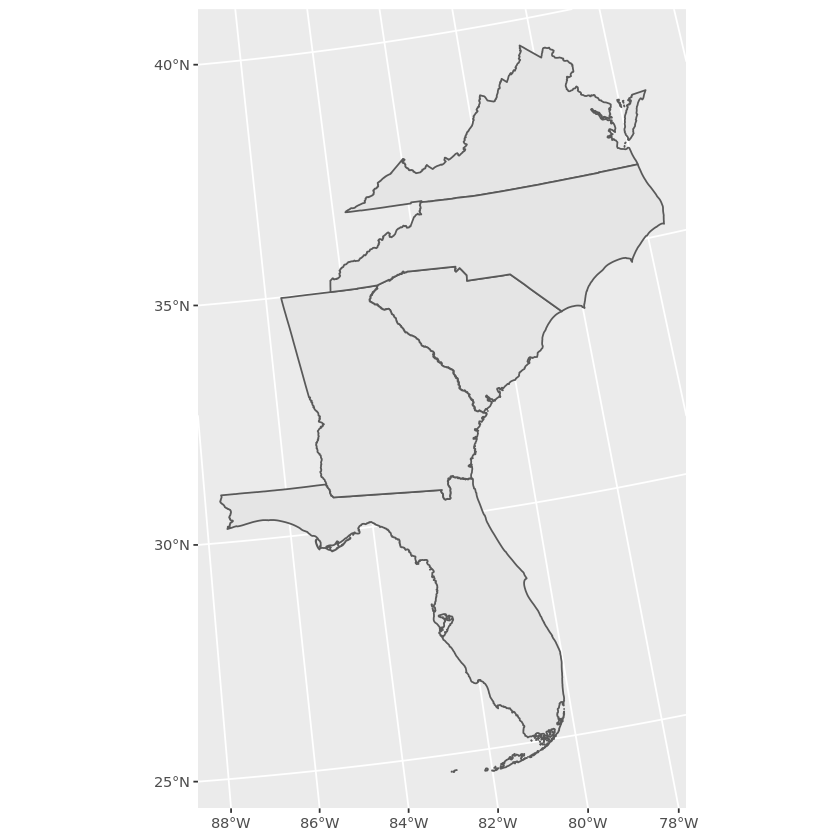

In [5]:
ggplot(data = se_state_bounds) +
  geom_sf()
ggsave(here::here("outputs", "se_bounds_map.png"), device = "png", dpi = 50)

In [7]:
nc_gages <- read_csv(file = here("data", "streamgages", "nc_gages.csv"))

Rows: 272 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): STAID, STANAME, CLASS, AGGECOREGI, HUC02, STATE, HCDN_2009, ACTIVE09
dbl (6): DRAIN_SQKM, LAT_GAGE, LNG_GAGE, FLYRS1900, FLYRS1950, FLYRS1990

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
head(nc_gages)

STAID,STANAME,CLASS,AGGECOREGI,DRAIN_SQKM,HUC02,LAT_GAGE,LNG_GAGE,STATE,HCDN_2009,ACTIVE09,FLYRS1900,FLYRS1950,FLYRS1990
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
0204382800,"PASQUOTANK RIVER NEAR SOUTH MILLS, NC",Ref,SECstPlain,160.7841,03,36.42139,-76.34250,NC,NA,yes,2,2,2
02053200,"POTECASI CREEK NEAR UNION, NC",Ref,SECstPlain,583.6599,03,36.37083,-77.02556,NC,yes,yes,51,51,20
02053500,"AHOSKIE CREEK AT AHOSKIE, NC",Non-ref,SECstPlain,165.8835,03,36.28028,-76.99944,NC,NA,yes,59,59,20
02068500,"DAN RIVER NEAR FRANCISCO, NC",Non-ref,EastHghlnds,321.6789,03,36.51500,-80.30306,NC,NA,yes,78,54,17
02069000,"DAN RIVER AT PINE HALL, NC",Non-ref,SEPlains,1280.2920,03,36.31930,-80.05004,NC,NA,yes,6,4,1
02070500,"MAYO RIVER NEAR PRICE, NC",Ref,SEPlains,672.6420,03,36.53389,-79.99139,NC,NA,yes,58,38,16


In [9]:
nc_gages_spatial <- st_as_sf(nc_gages, 
                             coords = c("LNG_GAGE", "LAT_GAGE"), 
                             crs = 4326, dim = "XY") %>%
  st_transform(crs = 5070)

nc_gages_spatial

ERROR while rich displaying an object: Error in dyn.load(file, DLLpath = DLLpath, ...): unable to load shared object '/srv/rlibs/jqr/libs/jqr.so':
  libjq.so.1: cannot open shared object file: No such file or directory

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prep

,STAID,STANAME,CLASS,AGGECOREGI,DRAIN_SQKM,HUC02,STATE,HCDN_2009,ACTIVE09,FLYRS1900,FLYRS1950,FLYRS1990,geometry
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<POINT [m]>
1,0204382800,"PASQUOTANK RIVER NEAR SOUTH MILLS, NC",Ref,SECstPlain,160.78410,03,NC,NA,yes,2,2,2,POINT (1733998 1665913)
2,02053200,"POTECASI CREEK NEAR UNION, NC",Ref,SECstPlain,583.65990,03,NC,yes,yes,51,51,20,POINT (1675686 1648113)
3,02053500,"AHOSKIE CREEK AT AHOSKIE, NC",Non-ref,SECstPlain,165.88350,03,NC,NA,yes,59,59,20,POINT (1679975 1638632)
4,02068500,"DAN RIVER NEAR FRANCISCO, NC",Non-ref,EastHghlnds,321.67890,03,NC,NA,yes,78,54,17,POINT (1386502 1611186)
5,02069000,"DAN RIVER AT PINE HALL, NC",Non-ref,SEPlains,1280.29200,03,NC,NA,yes,6,4,1,POINT (1412304 1593294)
6,02070500,"MAYO RIVER NEAR PRICE, NC",Ref,SEPlains,672.64200,03,NC,NA,yes,58,38,16,POINT (1413418 1617864)
7,02071000,"DAN RIVER NEAR WENTWORTH, NC",Non-ref,SEPlains,2706.75800,03,NC,NA,yes,69,60,20,POINT (1430173 1606934)
8,02074000,"SMITH RIVER AT EDEN, NC",Non-ref,SEPlains,1408.74200,03,NC,NA,yes,70,60,20,POINT (1433323 1620327)
9,02077200,"HYCO CREEK NEAR LEASBURG, NC",Ref,SEPlains,121.69440,03,NC,yes,yes,45,45,20,POINT (1485552 1614965)


In [10]:
nc_bounds <- st_read(here("data", "se_state_bounds", "nc_bounds.shp"))

Reading layer `nc_bounds' from data source 
  `/home/jovyan/data/se_state_bounds/nc_bounds.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 1054152 ymin: 1345332 xmax: 1833737 ymax: 1688859
proj4string:   +proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs 


In [11]:
nc_bounds_utm <- st_read(here("data", "se_state_bounds", "nc_bounds_utm.shp"))

Reading layer `nc_bounds_utm' from data source 
  `/home/jovyan/data/se_state_bounds/nc_bounds_utm.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 196772.2 ymin: 3747955 xmax: 1002210 ymax: 4057317
CRS:           26917


In [13]:
topo <- read_delim(here("data", "streamgages", "conterm_topo.txt"), delim = ",")

head(topo)

nc_gages_joined <- nc_gages_spatial %>%
full_join(topo, by = "STAID")

Rows: 9067 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): STAID
dbl (12): ELEV_MEAN_M_BASIN, ELEV_MAX_M_BASIN, ELEV_MIN_M_BASIN, ELEV_MEDIAN...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STAID,ELEV_MEAN_M_BASIN,ELEV_MAX_M_BASIN,ELEV_MIN_M_BASIN,ELEV_MEDIAN_M_BASIN,ELEV_STD_M_BASIN,ELEV_SITE_M,RRMEAN,RRMEDIAN,SLOPE_PCT,ASPECT_DEGREES,ASPECT_NORTHNESS,ASPECT_EASTNESS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01011000,363.1,634,186,364,58.8,187,0.395,0.397,5.9,193.9,-0.971,-0.241
01013500,273.3,604,157,253,81.8,157,0.260,0.215,6.9,130.0,-0.642,0.767
01015800,278.3,729,164,261,68.7,166,0.202,0.172,4.6,117.4,-0.460,0.888
01016500,324.6,651,165,317,79.4,165,0.328,0.313,6.8,113.0,-0.391,0.920
01017000,271.8,729,130,253,73.8,131,0.237,0.205,4.8,120.2,-0.503,0.864
01017060,184.5,213,149,184,13.3,155,0.554,0.547,2.6,56.6,0.551,0.834


In [18]:
glimpse(nc_gages_joined)

Rows: 9,067
Columns: 25
$ STAID               <chr> "0204382800", "02053200", "02053500", "02068500", …
$ STANAME             <chr> "PASQUOTANK RIVER NEAR SOUTH MILLS, NC", "POTECASI…
$ CLASS               <chr> "Ref", "Ref", "Non-ref", "Non-ref", "Non-ref", "Re…
$ AGGECOREGI          <chr> "SECstPlain", "SECstPlain", "SECstPlain", "EastHgh…
$ DRAIN_SQKM          <dbl> 160.78410, 583.65990, 165.88350, 321.67890, 1280.2…
$ HUC02               <chr> "03", "03", "03", "03", "03", "03", "03", "03", "0…
$ STATE               <chr> "NC", "NC", "NC", "NC", "NC", "NC", "NC", "NC", "N…
$ HCDN_2009           <chr> NA, "yes", NA, NA, NA, NA, NA, NA, "yes", NA, NA, …
$ ACTIVE09            <chr> "yes", "yes", "yes", "yes", "yes", "yes", "yes", "…
$ FLYRS1900           <dbl> 2, 51, 59, 78, 6, 58, 69, 70, 45, 36, 32, 96, 22, …
$ FLYRS1950           <dbl> 2, 51, 59, 54, 4, 38, 60, 60, 45, 36, 32, 59, 22, …
$ FLYRS1990           <dbl> 2, 20, 20, 17, 1, 16, 20, 20, 20, 20, 20, 19, 20, …
$ geometry      

Saving 6.67 x 6.67 in image



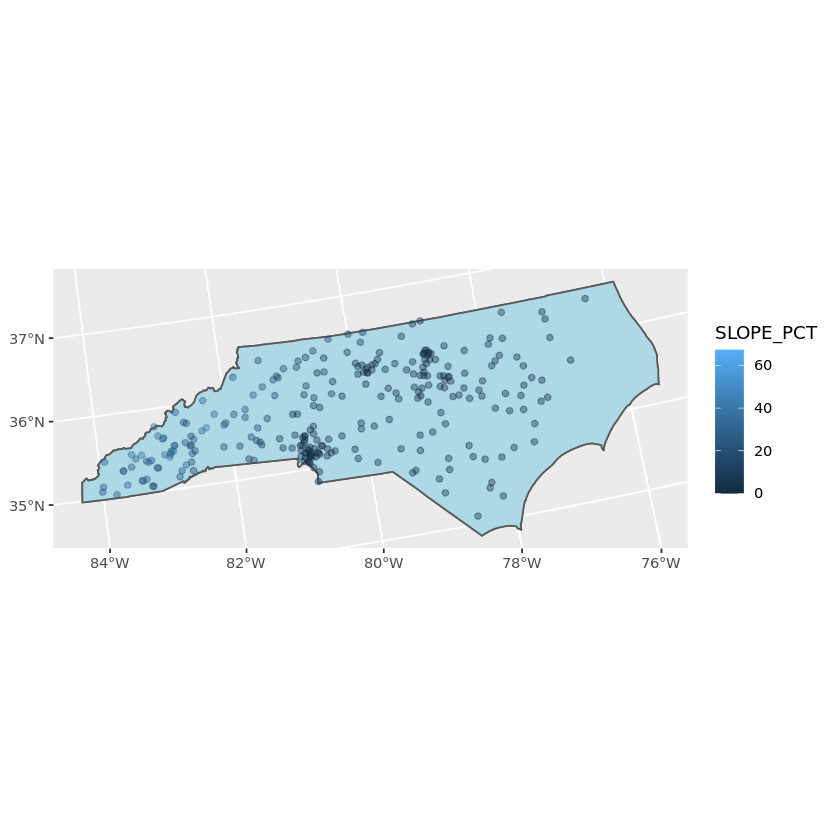

In [24]:
ggplot() +
geom_sf(data = nc_bounds) +
geom_sf(data = nc_bounds_utm, fill = "lightblue") +
geom_sf(data = nc_gages_joined, alpha = 0.4, aes(color = SLOPE_PCT))
ggsave(here("outputs", "nc_gages_slope_pct.png"), device = "png", dpi = 100)
